p, n: 0.5 9
x         0       1       2       3       4       5       6       7       8       9
P(x)  0.002  0.0176  0.0703  0.1641  0.2461  0.2461  0.1641  0.0703  0.0176   0.002
F(x)  0.002  0.0196  0.0899   0.254  0.5001  0.7462  0.9103  0.9806  0.9982  1.0002

 M(X)  D(X)  sd(X)  Mo(X)
  4.5  2.25    1.5      4



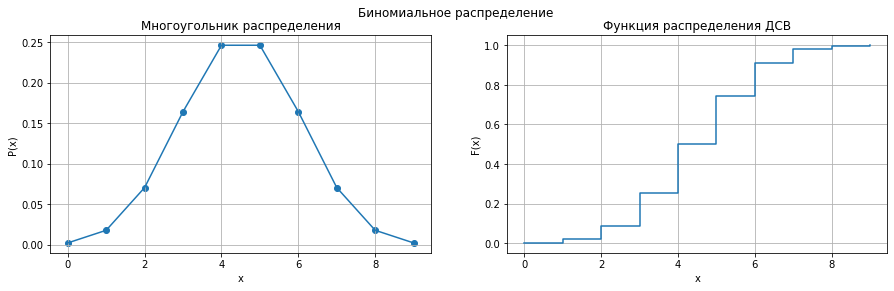

In [14]:
from math import factorial as fac, exp
import matplotlib.pyplot as plt
import pandas as pd


def combinations(n: int, k: int) -> int:

    return fac(n) / (fac(n - k) * fac(k) if k > 0 else 1) if n >= k else 0


def draw_dist(title: str, X: list, y: list, dist_func: list):
    fig, (plot1, plot2) = plt.subplots(figsize=(15, 4), nrows=1, ncols=2)
    plot1.plot(X, y)
    plot1.scatter(X, y)
    plot1.grid()
    plot1.set_xlabel("x")
    plot1.set_ylabel("P(x)")
    plot1.set_title("Многоугольник распределения")
    plot2.grid()
    plot2.set_xlabel("x")
    plot2.set_ylabel("F(x)")
    plot2.set_title("Функция распределения ДСВ")
    plot2.step(X, dist_func, where="post")
    fig.suptitle(title)


def F(X: list) -> list:
    return [round(sum(X[: k + 1]), 4) for k in range(len(X))]


def Mo(X: list) -> float:
    return max(enumerate(X), key=lambda x: x[1])[0]


def show_dist(K: list, P: list, F: list) -> pd.DataFrame:
    K = list(map(str, K))
    dist = pd.DataFrame({"x": K, "P(x)": P, "F(x)": F}).transpose()
    dist = dist.rename(columns=dict(zip(range(len(K)), [""] * len(K))))
    print(dist.to_string(header=False), end="\n\n")


def show_info(M: float, D: float, Mo: float):
    sd = round(D**0.5, 4)
    info = pd.DataFrame(
        {"M(X)": M, "D(X)": D, "sd(X)": sd, "Mo(X)": Mo}, index=[0]
    )
    print(info.to_string(index=False), end="\n\n")


def binomial(k: int, n: int, p: float) -> float:
    return round(
        (fac(n) * (p**k) * (1 - p) ** (n - k)) / (fac(k) * fac(n - k)), 4
    )


# 23 var: 0.5 9
p_event_bin, n_bin = map(float, input("p, n: ").split())
k_bin = list(range(int(n_bin + 1)))
P_bin = list(map(lambda k: binomial(k, int(n_bin), p_event_bin), k_bin))
M_bin = n_bin * p_event_bin
D_bin = M_bin * (1 - p_event_bin)

show_dist(k_bin, P_bin, F(P_bin))
show_info(M_bin, D_bin, Mo(P_bin))
draw_dist("Биномиальное распределение", k_bin, P_bin, F(P_bin))

lambda: 2.4
x          0       1       2       3       4       5       6       7       8       9      10      11
P(x)  0.0907  0.2177  0.2613   0.209  0.1254  0.0602  0.0241  0.0083  0.0025  0.0007  0.0002     0.0
F(x)  0.0907  0.3084  0.5697  0.7787  0.9041  0.9643  0.9884  0.9967  0.9992  0.9999  1.0001  1.0001

 M(X)  D(X)  sd(X)  Mo(X)
  2.4   2.4 1.5492      2



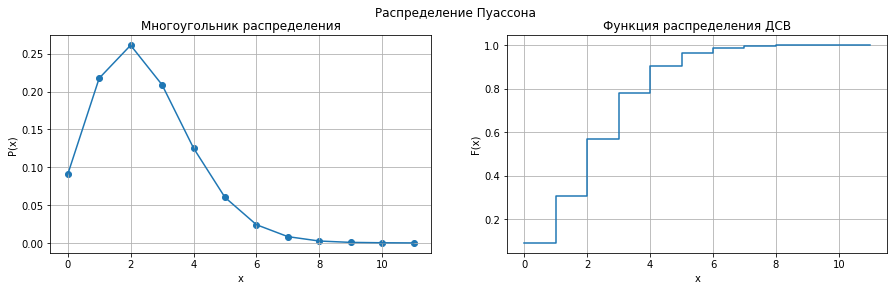

In [6]:
def poisson(k: int, lambda_: float) -> float:
    return round((lambda_**k) * exp(-lambda_) / fac(k), 4)


# 23 var: 2.4
lambda_ps = float(input("lambda: "))
k_ps = list(range(12))  # Подобрано эмпирически
P_ps = list(map(lambda k: poisson(k, lambda_ps), k_ps))
M_ps = D_ps = lambda_ps

show_dist(k_ps, P_ps, F(P_ps))
show_info(M_ps, D_ps, Mo(P_ps))
draw_dist("Распределение Пуассона", k_ps, P_ps, F(P_ps))

p: 0.5
x       1     2      3       4       5       6       7       8      9     10      11
P(x)  0.5  0.25  0.125  0.0625  0.0312  0.0156  0.0078  0.0039  0.002  0.001  0.0005
F(x)  0.5  0.75  0.875  0.9375  0.9687  0.9843  0.9921   0.996  0.998  0.999  0.9995

 M(X)   D(X)  sd(X)  Mo(X)
  2.0 0.7071 0.8409      1



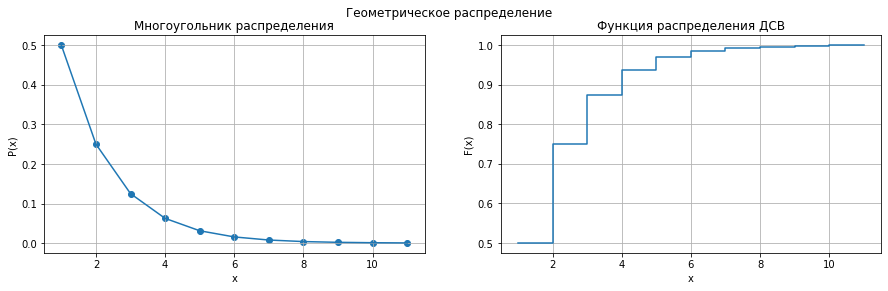

In [7]:
def geometric(k: int, p: float) -> float:
    return round(p * (1 - p) ** (k - 1), 4)


# 23 var: 0.5
p_geom = float(input("p: "))
k_geom = list(range(1, 12))  # Подобрано эмпирически
P_geom = list(map(lambda k: geometric(k, p_geom), k_geom))
M_geom = 1 / p_geom
D_geom = (1 - p_geom) / (p_geom**0.5)

show_dist(k_geom, P_geom, F(P_geom))
show_info(round(M_geom, 4), round(D_geom, 4), Mo(P_geom) + 1)
draw_dist("Геометрическое распределение", k_geom, P_geom, F(P_geom))

N, M, n: 20 10 7
x          4       5       6          7          8         9
P(x)  0.3251  0.1463  0.0271  5617.3375  2106.5015  468.1115
F(x)  0.3251  0.4714  0.4985   5617.836  7724.3375  8192.449

 M(X)   D(X)  sd(X)  Mo(X)
  3.5 1.1974 1.0943      3



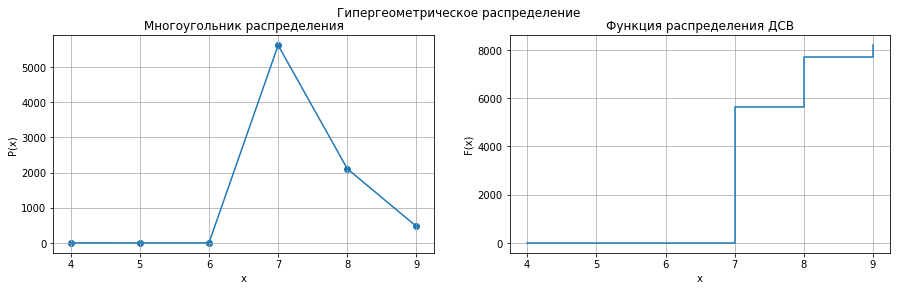

In [15]:
def hypergeometric(m: int, M: int, n: int, N: int) -> float:
    return round(
        combinations(M, m) * combinations(N - M, n - m) / combinations(N, n), 4
    )


# 23 var: 20, 10, 7
N, M, n_hg = map(int, input("N, M, n: ").split())
m_hg = list(range(4, 10))  # Подобрано эмпирически
P_hg = list(map(lambda m: hypergeometric(m, M, n_hg, N), m_hg))
M_hg = n_hg * M / N
D_hg = M_hg * (1 - M / N) * (1 - (n_hg - 1) / (N - 1))

show_dist(m_hg, P_hg, F(P_hg))
show_info(round(M_hg, 4), round(D_hg, 4), Mo(P_hg))
draw_dist("Гипергеометрическое распределение", m_hg, P_hg, F(P_hg))
